# NMF with Water

In [1]:
# imports
import numpy as np
from matplotlib import pyplot as plt

import seaborn as sns

from NonnegMFPy import nmf

#from ihip.ihop import io as ihop_io
from ihop.hydrolight import loisel23
from oceancolor.iop import cross

In [6]:
%matplotlib ipympl

# Load

## LS23

In [2]:
X=4
Y=0
ds = loisel23.load_ds(X, Y)

In [3]:
spec = ds['a'].data
wave = ds.Lambda.data

## Water

In [4]:
a_w = cross.a_water(wave, data='IOCCG')

In [7]:
a_w.size, wave.size

(81, 81)

# Check one

In [5]:
idx = 100

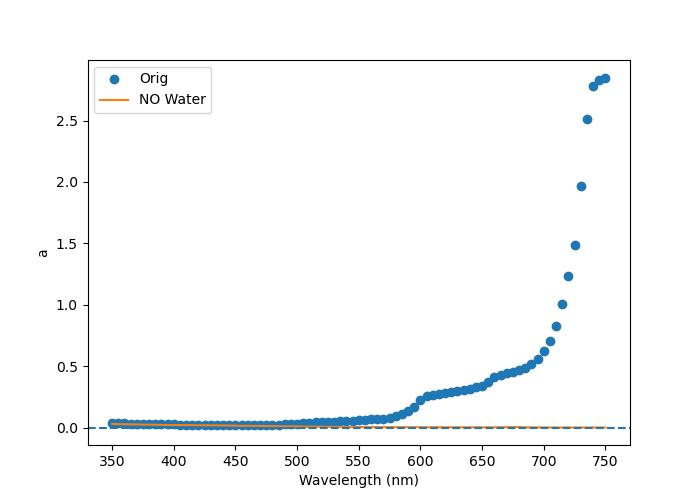

In [10]:
fig = plt.figure(figsize=(7,5))

plt.clf()
ax = plt.gca()

ax.plot(wave,spec[idx, :], 'o', label=r'Orig')
ax.plot(wave,spec[idx, :]-a_w, label=r'NO Water')
#ax.plot(wave,recon, label=r'Recon')
#ax.plot(wave,M[2], label=r'$\xi_3$')
ax.axhline(0., ls='--')
#
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('a')
ax.legend()
#
plt.show()

# Subtract it off

In [11]:
spec.shape

(3320, 81)

In [12]:
spec_nw = spec - np.outer(np.ones(3320), a_w)

## Keep to 0 or more

In [14]:
spec_nw.min()

-9.536743172944284e-08

In [15]:
spec_nw = np.maximum(spec_nw, 0.)

# NMF

In [16]:
g = nmf.NMF(spec_nw.T, n_components=4)

In [17]:
chi2, time_used = g.SolveNMF() 

Current Chi2=0.0001, Previous Chi2=1.3700, Change=99.9928% @ niters=0
Current Chi2=0.0000, Previous Chi2=0.0000, Change=4.4542% @ niters=20
Current Chi2=0.0000, Previous Chi2=0.0000, Change=6.6655% @ niters=40
Current Chi2=0.0000, Previous Chi2=0.0000, Change=1.7084% @ niters=60
Current Chi2=0.0000, Previous Chi2=0.0000, Change=0.2946% @ niters=80
Current Chi2=0.0000, Previous Chi2=0.0000, Change=0.0786% @ niters=100
Current Chi2=0.0000, Previous Chi2=0.0000, Change=0.0343% @ niters=120
Current Chi2=0.0000, Previous Chi2=0.0000, Change=0.0237% @ niters=140
Current Chi2=0.0000, Previous Chi2=0.0000, Change=0.0214% @ niters=160
Current Chi2=0.0000, Previous Chi2=0.0000, Change=0.0212% @ niters=180
Current Chi2=0.0000, Previous Chi2=0.0000, Change=0.0218% @ niters=200
Current Chi2=0.0000, Previous Chi2=0.0000, Change=0.0228% @ niters=220
Current Chi2=0.0000, Previous Chi2=0.0000, Change=0.0242% @ niters=240
Current Chi2=0.0000, Previous Chi2=0.0000, Change=0.0257% @ niters=260
Current Chi

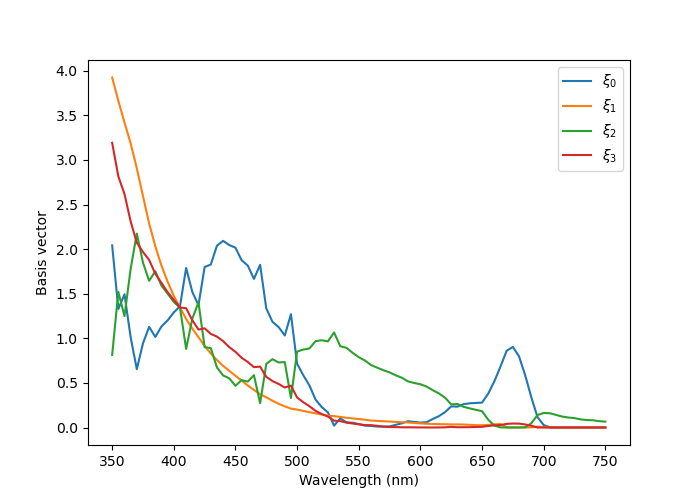

In [21]:
M = g.W.T
wave = ds.Lambda.data
#
fig = plt.figure(figsize=(7,5))

plt.clf()
ax = plt.gca()
for ss in range(M.shape[0]):
    ax.plot(wave,M[ss], label=r'$\xi_'+f'{ss}'+'$')
#
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Basis vector')
ax.legend()
#
plt.show()